<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(_0_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.4_n20.csv',
 'data_multi_delta_-0.4_n30.csv',
 'data_multi_delta_-0.4_n60.csv',
 'data_multi_delta_-0.4_n120.csv',
 'data_multi_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,55.449715,32.158057,0.230224,97.837996,97.728541,0.109455
1,0.0,1.0,31.863743,37.967042,-0.267834,79.562951,79.804757,-0.241806
2,0.0,2.0,72.579141,91.812485,-0.096826,174.294800,174.240956,0.053844
3,0.0,3.0,38.176407,54.292859,-0.719684,101.749581,102.376696,-0.627115
4,0.0,4.0,90.112801,78.927283,-0.158699,178.881385,179.049247,-0.167862
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,34.455427,47.923629,-0.379962,91.999094,92.341962,-0.342867
19996,999.0,16.0,20.656226,85.201205,0.126854,115.984285,115.931636,0.052650
19997,999.0,17.0,39.480397,37.794315,-0.359518,86.915194,87.204822,-0.289628
19998,999.0,18.0,46.891659,56.127191,-0.071670,112.947180,112.975278,-0.028098


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,55.449715,32.158057,0.230224,97.837996,97.728541,0.109455
1,0.0,1.0,31.863743,37.967042,-0.267834,79.562951,79.804757,-0.241806
2,0.0,2.0,72.579141,91.812485,-0.096826,174.294800,174.240956,0.053844
3,0.0,3.0,38.176407,54.292859,-0.719684,101.749581,102.376696,-0.627115
4,0.0,4.0,90.112801,78.927283,-0.158699,178.881385,179.049247,-0.167862
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,34.455427,47.923629,-0.379962,91.999094,92.341962,-0.342867
19996,999.0,16.0,20.656226,85.201205,0.126854,115.984285,115.931636,0.052650
19997,999.0,17.0,39.480397,37.794315,-0.359518,86.915194,87.204822,-0.289628
19998,999.0,18.0,46.891659,56.127191,-0.071670,112.947180,112.975278,-0.028098


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    55.449715  32.158057  0.230224   97.837996   97.728541  0.109455
      1.0    31.863743  37.967042 -0.267834   79.562951   79.804757 -0.241806
      2.0    72.579141  91.812485 -0.096826  174.294800  174.240956  0.053844
      3.0    38.176407  54.292859 -0.719684  101.749581  102.376696 -0.627115
      4.0    90.112801  78.927283 -0.158699  178.881385  179.049247 -0.167862
...                ...        ...       ...         ...         ...       ...
999.0 15.0   34.455427  47.923629 -0.379962   91.999094   92.341962 -0.342867
      16.0   20.656226  85.201205  0.126854  115.984285  115.931636  0.052650
      17.0   39.480397  37.794315 -0.359518   86.915194   87.204822 -0.289628
      18.0   46.891659  56.127191 -0.071670  112.947180  112.975278 -0.028098
      19.0   50.862928  28.291529 -0.153193   89.001264   89.040452 -0.039188

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    55.449715  32.158057  0.230224   97.837996   97.728541  0.109455
      1.0    31.863743  37.967042 -0.267834   79.562951   79.804757 -0.241806
      2.0    72.579141  91.812485 -0.096826  174.294800  174.240956  0.053844
      3.0    38.176407  54.292859 -0.719684  101.749581  102.376696 -0.627115
      4.0    90.112801  78.927283 -0.158699  178.881385  179.049247 -0.167862
...                ...        ...       ...         ...         ...       ...
999.0 15.0   34.455427  47.923629 -0.379962   91.999094   92.341962 -0.342867
      16.0   20.656226  85.201205  0.126854  115.984285  115.931636  0.052650
      17.0   39.480397  37.794315 -0.359518   86.915194   87.204822 -0.289628
      18.0   46.891659  56.127191 -0.071670  112.947180  112.975278 -0.028098
      19.0   50.862928  28.291529 -0.153193   89.001264   89.040452 -0.039188

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,55.449715,32.158057,0.230224,97.837996,97.728541,0.109455
1,0.0,1.0,31.863743,37.967042,-0.267834,79.562951,79.804757,-0.241806
2,0.0,2.0,72.579141,91.812485,-0.096826,174.294800,174.240956,0.053844
3,0.0,3.0,38.176407,54.292859,-0.719684,101.749581,102.376696,-0.627115
4,0.0,4.0,90.112801,78.927283,-0.158699,178.881385,179.049247,-0.167862
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,34.455427,47.923629,-0.379962,91.999094,92.341962,-0.342867
19996,999.0,16.0,20.656226,85.201205,0.126854,115.984285,115.931636,0.052650
19997,999.0,17.0,39.480397,37.794315,-0.359518,86.915194,87.204822,-0.289628
19998,999.0,18.0,46.891659,56.127191,-0.071670,112.947180,112.975278,-0.028098


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    55.449715  32.158057  0.230224   97.837996   97.728541  0.109455
      1.0    31.863743  37.967042 -0.267834   79.562951   79.804757 -0.241806
      2.0    72.579141  91.812485 -0.096826  174.294800  174.240956  0.053844
      3.0    38.176407  54.292859 -0.719684  101.749581  102.376696 -0.627115
      4.0    90.112801  78.927283 -0.158699  178.881385  179.049247 -0.167862
...                ...        ...       ...         ...         ...       ...
999.0 15.0   34.455427  47.923629 -0.379962   91.999094   92.341962 -0.342867
      16.0   20.656226  85.201205  0.126854  115.984285  115.931636  0.052650
      17.0   39.480397  37.794315 -0.359518   86.915194   87.204822 -0.289628
      18.0   46.891659  56.127191 -0.071670  112.947180  112.975278 -0.028098
      19.0   50.862928  28.291529 -0.153193   89.001264   89.040452 -0.039188

[20000 rows x 6 columns]

<AxesSubplot:xlabel='x2', ylabel='e'>

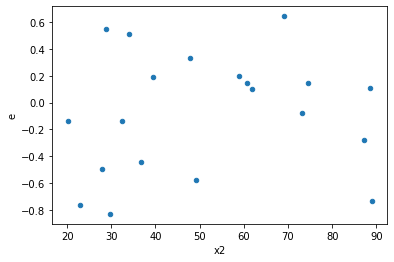

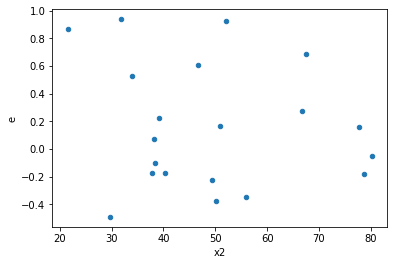

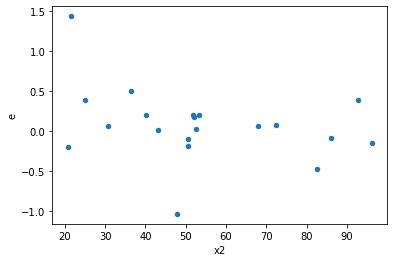

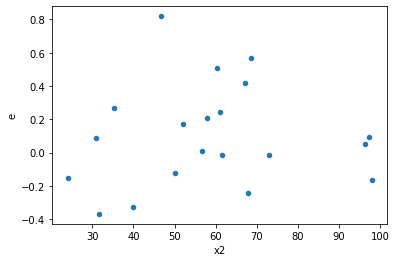

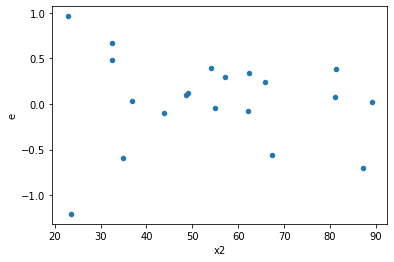

In [12]:
tablenew0 = table.loc[21.0]
tablenew1 = table.loc[24.0]
tablenew2 = table.loc[139.0]
tablenew3 = table.loc[161.0]
tablenew4 = table.loc[178.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

<ipython-input-14-7bd20896c3a8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity'


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,6.0,6.0,1.0073926027187694,1.8828331789337727,0.1678987671197949,0.3138055298222954,1.869016284070727,0.4658493045830636,0.7670753477084682,0.2329246522915318,Reject001=1 : Homoscedasticity
4.0,6.0,6.0,0.6565485600740575,1.2642992350352147,0.10942476001234291,0.21071653917253577,1.9256751319241396,0.4451584075594148,0.7774207962202926,0.2225792037797074,Reject001=1 : Homoscedasticity
7.0,6.0,6.0,0.5220838228629447,0.9627503707791489,0.08701397047715746,0.16045839512985816,1.8440532508740193,0.47535165945543256,0.7623241702722837,0.23767582972771628,Reject001=1 : Homoscedasticity
8.0,6.0,6.0,0.40215183329372484,0.46589659545099293,0.06702530554895414,0.07764943257516549,1.1585091920013952,0.8628043898434536,0.5685978050782732,0.4314021949217268,Reject001=1 : Homoscedasticity
12.0,6.0,6.0,0.1764164361315366,1.2621624957576194,0.0294027393552561,0.21036041595960323,7.154449570767587,0.030432613281803578,0.9847836933590982,0.015216306640901789,Reject001=1 : Homoscedasticity
20.0,6.0,6.0,2.1680326673071293,2.485111627536075,0.36133877788452157,0.4141852712560125,1.146251929230745,0.8726269492416612,0.5636865253791694,0.4363134746208306,Reject001=1 : Homoscedasticity
23.0,6.0,6.0,0.37495965720821495,0.8905382113074746,0.06249327620136916,0.14842303521791242,2.3750240704240855,0.3164238856541943,0.8417880571729028,0.15821194282709716,Reject001=1 : Homoscedasticity
25.0,6.0,6.0,0.7595436433879739,0.7983362417545271,0.12659060723132898,0.13305604029242118,1.051073560689044,0.9533301242788184,0.5233349378605908,0.4766650621394092,Reject001=1 : Homoscedasticity
28.0,6.0,6.0,0.9090318313817133,1.178541894120243,0.15150530523028555,0.1964236490200405,1.2964803359293577,0.7606099283817394,0.6196950358091303,0.3803049641908697,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,0.24080728248576155,0.2245875989663442,0.04013454708096026,0.0374312664943907,0.9326445473243676,0.9347064379521239,Reject001=1 : Homoscedasticity
1.0,6.0,6.0,1.0073926027187694,1.8828331789337727,0.1678987671197949,0.3138055298222954,1.869016284070727,0.4658493045830636,Reject001=1 : Homoscedasticity
2.0,6.0,6.0,0.7850758394348708,0.504058204045867,0.13084597323914512,0.08400970067431117,0.6420503328808442,0.6040335821351004,Reject001=1 : Homoscedasticity
3.0,6.0,6.0,0.9189049717125035,0.3250493380994341,0.1531508286187506,0.05417488968323902,0.3537355309914808,0.23158892071012124,Reject001=1 : Homoscedasticity
4.0,6.0,6.0,0.6565485600740575,1.2642992350352147,0.10942476001234291,0.21071653917253577,1.9256751319241396,0.4451584075594148,Reject001=1 : Homoscedasticity
5.0,6.0,6.0,1.3462706519127878,0.6021859192433648,0.22437844198546464,0.10036431987389414,0.4472992992811484,0.3505368009696248,Reject001=1 : Homoscedasticity
6.0,6.0,6.0,1.8005806383742584,0.23441484041380783,0.3000967730623764,0.03906914006896797,0.130188471106443,0.025531233507881605,Reject001=1 : Homoscedasticity
7.0,6.0,6.0,0.5220838228629447,0.9627503707791489,0.08701397047715746,0.16045839512985816,1.8440532508740193,0.47535165945543256,Reject001=1 : Homoscedasticity
8.0,6.0,6.0,0.40215183329372484,0.46589659545099293,0.06702530554895414,0.07764943257516549,1.1585091920013952,0.8628043898434536,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      980
Reject001=0 : Heteroscedasticity     20
Name: Result_test, dtype: int64